In [1]:
##Basic Linear Regression
import pandas as pd
import numpy as np
import sklearn 


In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [8]:
oecd_bli = pd.read_csv( 'C:\\Users\\rahul\\OneDrive\\Desktop\\ML_DS\\Pandas_Practice\\ML_Data\\oecd_bli.csv', thousands=',')
gdp_per_capita = pd.read_csv('C:\\Users\\rahul\\OneDrive\\Desktop\\ML_DS\\Pandas_Practice\\ML_Data\\gdp_per_capita.xls',thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [11]:
gdp_per_capita


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
5,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
6,Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
7,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
8,Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
9,Azerbaijan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5739.433,2014.0


In [12]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [13]:
##country stats is my dataset that is clean and ready to be used

country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Mexico,9009.280,6.6
Russia,9054.914,6.0
Turkey,9437.372,5.5
Hungary,12239.894,5.3
Chile,13340.905,6.7


In [63]:
# Visualize the data
country_stats.plot(kind = 'scatter', x= 'GDP per capita', y='Life satisfaction')


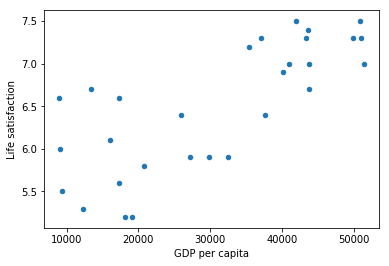

In [64]:
plt.show()

In [21]:
country_stats["GDP per capita"].values

array([  9009.28 ,   9054.914,   9437.372,  12239.894,  13340.905,
        15991.736,  17256.918,  17288.083,  18064.288,  19121.592,
        20732.482,  25864.721,  27195.197,  29866.581,  32485.545,
        35343.336,  37044.891,  37675.006,  40106.632,  40996.511,
        41973.988,  43331.961,  43603.115,  43724.031,  43770.688,
        49866.266,  50854.583,  50961.865,  51350.744])

In [23]:
np.c_[country_stats['GDP per capita']]

array([[  9009.28 ],
       [  9054.914],
       [  9437.372],
       [ 12239.894],
       [ 13340.905],
       [ 15991.736],
       [ 17256.918],
       [ 17288.083],
       [ 18064.288],
       [ 19121.592],
       [ 20732.482],
       [ 25864.721],
       [ 27195.197],
       [ 29866.581],
       [ 32485.545],
       [ 35343.336],
       [ 37044.891],
       [ 37675.006],
       [ 40106.632],
       [ 40996.511],
       [ 41973.988],
       [ 43331.961],
       [ 43603.115],
       [ 43724.031],
       [ 43770.688],
       [ 49866.266],
       [ 50854.583],
       [ 50961.865],
       [ 51350.744]])

In [24]:
a= np.array([[1,2,3],
            [4,5,6]])

In [25]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
b= np.array([[7,8,9],
            [10,11,12]])

In [27]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
b

array([[ 7,  8,  9],
       [10, 11, 12]])

In [29]:
np.c_[a, b]

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [30]:
np.r_[a,b]

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [31]:
np.r_[a]

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
np.c_[a]

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
c = np.array([3,5,6,7,8,10])

In [35]:
c_1= np.c_[c]

In [38]:
c_1.shape

(6, 1)

In [40]:
c.shape

(6,)

In [41]:
c

array([ 3,  5,  6,  7,  8, 10])

In [44]:
X= country_stats['GDP per capita'].values

In [49]:
X=X[:, np.newaxis]

In [102]:
X.shape
X

array([[  9009.28 ],
       [  9054.914],
       [  9437.372],
       [ 12239.894],
       [ 13340.905],
       [ 15991.736],
       [ 17256.918],
       [ 17288.083],
       [ 18064.288],
       [ 19121.592],
       [ 20732.482],
       [ 25864.721],
       [ 27195.197],
       [ 29866.581],
       [ 32485.545],
       [ 35343.336],
       [ 37044.891],
       [ 37675.006],
       [ 40106.632],
       [ 40996.511],
       [ 41973.988],
       [ 43331.961],
       [ 43603.115],
       [ 43724.031],
       [ 43770.688],
       [ 49866.266],
       [ 50854.583],
       [ 50961.865],
       [ 51350.744]])

In [53]:
Y= country_stats['Life satisfaction'].values

In [54]:
Y.shape

(29,)

In [56]:
Y=Y[:,np.newaxis]

In [57]:
Y.shape

(29, 1)

In [70]:
# Select a linear model

import sklearn.linear_model

In [74]:
linear_model= sklearn.linear_model.LinearRegression()

In [91]:
#train the model, so it finds the best values for the parameters

linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))

NameError: name 'model' is not defined

In [93]:
X_mex_gdp = 22587

In [94]:
linear_model.predict(X_mex_gdp)

array([[ 6.18443854]])

In [95]:
X_gdp = np.array([30000, 28000, 32000])

In [96]:
X_gdp

array([30000, 28000, 32000])

In [99]:
X_new = X_gdp[:, np.newaxis]

In [100]:
X_new.shape

(3, 1)

In [101]:
linear_model.predict(X_new)

array([[ 6.47617904],
       [ 6.39746854],
       [ 6.55488955]])

In [1]:
## housing Data 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [3]:
#importing the housing data

housing= pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\ML_DS\\Pandas_Practice\\ML_Data\\housing.csv")

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8CD37C208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B8CE006E80>]], dtype=object)

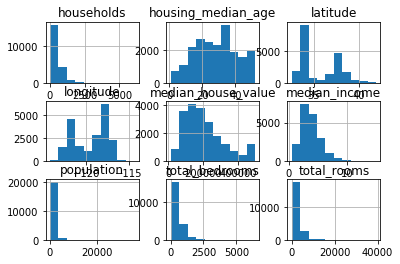

In [7]:
%matplotlib inline


housing.hist()

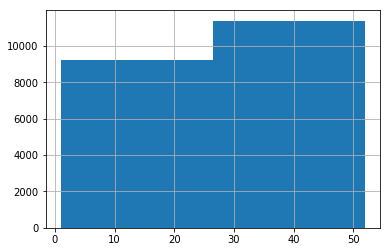

In [8]:
housing['housing_median_age'].hist(bins = 2)

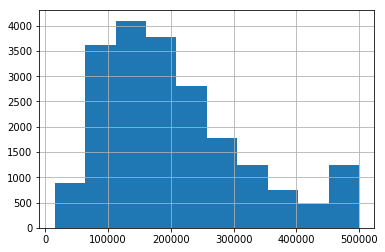

In [19]:
housing['median_house_value'].hist()

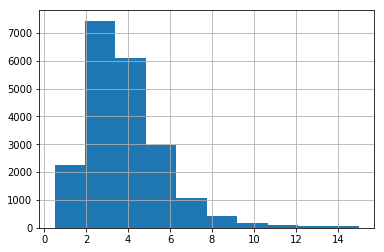

In [22]:
housing['median_income'].hist()

In [9]:
#creating the test set, to avoid snoooping bias

import sklearn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
h_train_set, h_test_set= train_test_split(housing, test_size = 0.2, random_state = 42)

In [15]:
h_train_set.head()
len(h_train_set)

16512

In [16]:
h_test_set.head()
len(h_test_set)

4128

In [17]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

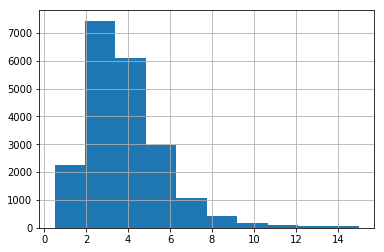

In [36]:
housing['median_income'].hist()

In [11]:
housing['income_cat']= np.ceil(housing['median_income']/1.5)

In [12]:
housing['income_cat'].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
#collapsing catergories, people having more than 5 let them be 5, we know you are rich..

housing['median_income'].where(housing['median_income']< 5.0,5.0, inplace = True )

In [14]:
housing['median_income'].hist()

In [15]:
housing['median_income'].hist(bins =15)

In [16]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [17]:
housing['income_cat'].hist()

In [18]:
housing['median_income'].hist()

In [19]:
housing['income_cat']= np.ceil(housing['median_income']/1.5)

In [20]:
housing['income_cat'].hist()

In [20]:
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace =True )

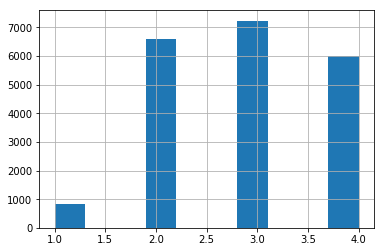

In [21]:
%matplotlib inline
housing['income_cat'].hist()


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
##Provides train/test indices to split data in train/test sets.

h_index_split= StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state =42)

In [21]:
for train_index, test_index in h_index_split.split(housing, housing['income_cat']):
                strata_train_set = housing.loc[train_index]
                strata_test_set = housing.loc[test_index]

In [22]:
strata_train_set.shape

(16512, 11)

In [23]:
housing['income_cat'].value_counts()/ len(housing['income_cat'])

3.0    0.350581
2.0    0.318847
4.0    0.290746
1.0    0.039826
Name: income_cat, dtype: float64

In [26]:
strata_test_set['income_cat'].value_counts()/ len(strata_test_set['income_cat'])

3.0    0.350533
2.0    0.318798
4.0    0.290698
1.0    0.039971
Name: income_cat, dtype: float64

In [27]:
train_set_cp= strata_train_set.copy()
train_set_cp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1.0
14408,-117.25,32.76,38.0,2331.0,493.0,836.0,433.0,4.9125,452600.0,NEAR OCEAN,4.0
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,<1H OCEAN,2.0
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,60800.0,INLAND,2.0
10846,-117.90,33.67,25.0,639.0,98.0,311.0,93.0,5.0000,275900.0,<1H OCEAN,4.0
16997,-122.27,37.54,5.0,2140.0,420.0,990.0,394.0,5.0000,438800.0,NEAR BAY,4.0
15056,-116.93,32.79,23.0,5759.0,1258.0,3108.0,1202.0,3.0927,140600.0,<1H OCEAN,3.0
8935,-118.50,33.99,22.0,3484.0,975.0,1268.0,952.0,3.2609,500001.0,<1H OCEAN,3.0
18806,-121.55,40.48,14.0,2413.0,524.0,805.0,329.0,2.7857,77400.0,INLAND,2.0
6987,-118.03,33.97,39.0,2126.0,434.0,1103.0,433.0,3.2852,196200.0,<1H OCEAN,3.0


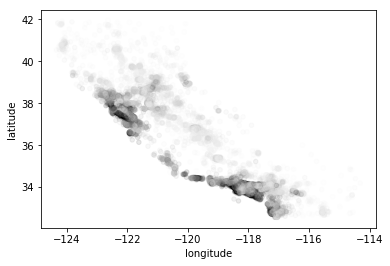

In [45]:
train_set_cp.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1,color = train_set_cp['median_house_value'])

In [46]:
train_set_cp.drop(['income_cat'], axis = 1, inplace=True)

In [47]:
strata_test_set.drop(['income_cat'], axis =1, inplace = True)

In [48]:
strata_train_set.drop(['income_cat'], axis = 1, inplace=True)

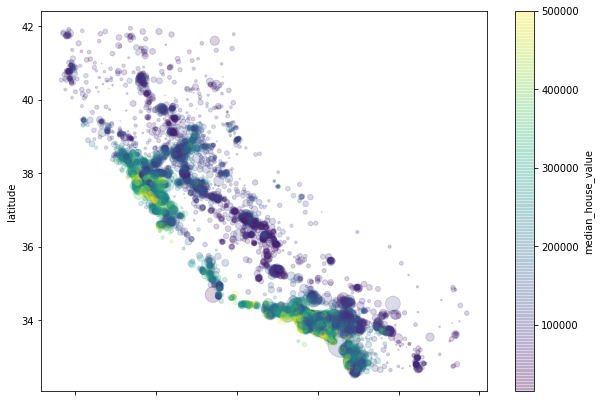

In [49]:
train_set_cp.plot(kind = 'Scatter', x = 'longitude', y  = 'latitude', alpha = 0.2, s= train_set_cp['population']/50, c = 'median_house_value', figsize=(10, 7),colormap= 'viridis')

In [50]:
lin_corr= strata_train_set.corr()

In [51]:
strata_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
14408,-117.25,32.76,38.0,2331.0,493.0,836.0,433.0,4.9125,452600.0,NEAR OCEAN
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,<1H OCEAN
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,60800.0,INLAND
10846,-117.90,33.67,25.0,639.0,98.0,311.0,93.0,5.0000,275900.0,<1H OCEAN


In [52]:
lin_corr['median_house_value']

longitude            -0.048321
latitude             -0.142622
housing_median_age    0.108043
total_rooms           0.136666
total_bedrooms        0.049904
population           -0.023974
households            0.066309
median_income         0.604960
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8D00D4CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002B8D019E080>]], dtype=object)

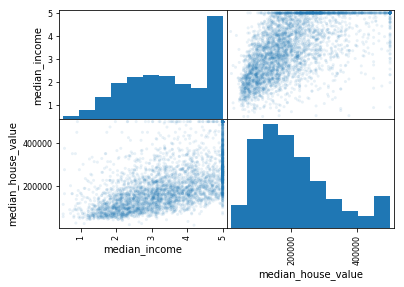

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(strata_test_set[['median_income', 'median_house_value']], alpha= 0.1)

In [27]:
#strata_test_set.head()

#strata_test_set_f =strata_test_set.drop(['median_house_value'], axis =1)
#strata_test_set_f.head()

strata_train_set_f = strata_train_set.drop(['median_house_value', 'income_cat'], axis =1)
strata_train_set_f.head()

strata_train_set_lab = strata_train_set['median_house_value']

strata_train_set_lab.head()

4861     500001.0
14408    452600.0
4760     150700.0
13897     60800.0
10846    275900.0
Name: median_house_value, dtype: float64

In [130]:
#strata_test_set['bedrooms_per_household'] =  strata_test_set['total_bedrooms']/strata_test_set['households']

In [142]:
train_set_cp['bedrooms_per_household'] = train_set_cp['total_bedrooms']/train_set_cp['total_rooms']

In [135]:
train_set_cp['people_per_household'] = train_set_cp['population']/train_set_cp['households']

In [136]:
train_set_cp['rooms_per_household'] = train_set_cp['total_rooms']/train_set_cp['households']

In [139]:
lin_corr= train_set_cp.corr()

In [143]:
lin_corr['median_house_value'].sort_values(ascending = False)

median_house_value        1.000000
median_income             0.687160
rooms_per_household       0.146285
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
people_per_household     -0.021985
population               -0.026920
bedrooms_per_household   -0.043343
longitude                -0.047432
latitude                 -0.142724
Name: median_house_value, dtype: float64

In [ ]:
##preparing the data

#split the feature data from the label data 

In [28]:
train_set_cp.head()

NameError: name 'train_set_cp' is not defined

In [146]:
train_f_data= train_set_cp.drop(['median_house_value'], axis =1)

In [29]:
train_f_data.head()

NameError: name 'train_f_data' is not defined

In [151]:
train_labels= train_set_cp['median_house_value'].copy()

4861     500001.0
14408    452600.0
4760     150700.0
13897     60800.0
10846    275900.0
Name: median_house_value, dtype: float64

In [153]:
train_f_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
longitude                 16512 non-null float64
latitude                  16512 non-null float64
housing_median_age        16512 non-null float64
total_rooms               16512 non-null float64
total_bedrooms            16354 non-null float64
population                16512 non-null float64
households                16512 non-null float64
median_income             16512 non-null float64
ocean_proximity           16512 non-null object
bedrooms_per_household    16354 non-null float64
people_per_household      16512 non-null float64
rooms_per_household       16512 non-null float64
dtypes: float64(11), object(1)
memory usage: 2.3+ MB


In [155]:
#train_f_data.dropna(subset=['total_bedrooms'], axis=0)

train_f_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
longitude                 16512 non-null float64
latitude                  16512 non-null float64
housing_median_age        16512 non-null float64
total_rooms               16512 non-null float64
total_bedrooms            16354 non-null float64
population                16512 non-null float64
households                16512 non-null float64
median_income             16512 non-null float64
ocean_proximity           16512 non-null object
bedrooms_per_household    16354 non-null float64
people_per_household      16512 non-null float64
rooms_per_household       16512 non-null float64
dtypes: float64(11), object(1)
memory usage: 2.3+ MB


In [158]:
## replacing nulls with the median values

b_median=train_f_data['total_bedrooms'].median()

train_f_data['total_bedrooms'].fillna(b_median, inplace  = True)

In [69]:
train_f_data.info()

NameError: name 'train_f_data' is not defined

In [38]:
###easier way using imputer fron sklearn




from sklearn.preprocessing import Imputer

In [161]:
m_imputer=Imputer(strategy = 'median')

In [162]:
train_f_data_num=train_f_data.drop(['ocean_proximity'], axis =1)

In [164]:
train_f_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude                 16512 non-null float64
latitude                  16512 non-null float64
housing_median_age        16512 non-null float64
total_rooms               16512 non-null float64
total_bedrooms            16512 non-null float64
population                16512 non-null float64
households                16512 non-null float64
median_income             16512 non-null float64
bedrooms_per_household    16354 non-null float64
people_per_household      16512 non-null float64
rooms_per_household       16512 non-null float64
dtypes: float64(11)
memory usage: 2.1 MB


In [175]:
m_imputer.fit(train_f_data_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [166]:
train_f_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude                 16512 non-null float64
latitude                  16512 non-null float64
housing_median_age        16512 non-null float64
total_rooms               16512 non-null float64
total_bedrooms            16512 non-null float64
population                16512 non-null float64
households                16512 non-null float64
median_income             16512 non-null float64
bedrooms_per_household    16354 non-null float64
people_per_household      16512 non-null float64
rooms_per_household       16512 non-null float64
dtypes: float64(11)
memory usage: 2.1 MB


In [178]:
X=m_imputer.transform(train_f_data_num)

In [179]:
housing_tr_num= pd.DataFrame(X, columns= train_f_data_num.columns)

In [177]:
m_imputer.statistics_

array([ -1.18510000e+02,   3.42600000e+01,   2.90000000e+01,
         2.11950000e+03,   4.33000000e+02,   1.16400000e+03,
         4.08000000e+02,   3.54090000e+00,   2.03031374e-01,
         2.81765270e+00,   5.23228423e+00])

In [180]:
housing_tr_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,people_per_household,rooms_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0.223852,2.094395,4.625369
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.159057,2.707965,6.008850
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0.241291,2.025974,4.225108
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0.200866,4.135977,5.232295
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0.231341,3.047847,4.505810


In [28]:
#train_labels

#strata_train_set_f.info()

strata_train_set_f_1.info()

NameError: name 'strata_train_set_f_1' is not defined

In [29]:
#housing_cat=train_f_data['ocean_proximity']
#strata_train_set_f.head()
housing_cat= strata_train_set_f['ocean_proximity']
housing_cat.index

Int64Index([ 4861, 14408,  4760, 13897, 10846, 16997, 15056,  8935, 18806,
             6987,
            ...
             1718, 10384, 17129,  6559, 14222,  4748, 19249, 14585, 18596,
              599],
           dtype='int64', length=16512)

In [30]:
housing_cat_enc, housing_catg= housing_cat.factorize()

In [31]:
housing_cat_enc

array([0, 1, 0, ..., 1, 1, 3], dtype=int64)

In [32]:
housing_cat_enc.shape

#drop ocean cat and use this coded column  instead

strata_train_set_f_1 = strata_train_set_f.drop(['ocean_proximity'], axis =1)

strata_train_set_f_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4861 to 599
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16346 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [33]:
Ocean_prox_enc= pd.Series(housing_cat_enc, name = 'Ocean_prox_enc', index= strata_train_set_f_1.index)

Ocean_prox_enc.shape

(16512,)

In [34]:
Ocean_prox_enc.index.values

array([ 4861, 14408,  4760, ..., 14585, 18596,   599], dtype=int64)

In [36]:
strata_train_set_f_1.index.values

#Ocean_prox_enc.index.values

array([ 4861, 14408,  4760, ..., 14585, 18596,   599], dtype=int64)

In [37]:
house_train= pd.concat([strata_train_set_f_1, Ocean_prox_enc], axis = 1)

house_train.index



Int64Index([ 4861, 14408,  4760, 13897, 10846, 16997, 15056,  8935, 18806,
             6987,
            ...
             1718, 10384, 17129,  6559, 14222,  4748, 19249, 14585, 18596,
              599],
           dtype='int64', length=16512)

In [192]:

housing_catg


Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [214]:
housing_cat_enc.shape

(16512,)

In [207]:
housing_cat_enc_reshapd = housing_cat_enc.reshape(-1,1)

In [209]:
from sklearn.preprocessing import OneHotEncoder


In [210]:
enc= OneHotEncoder()

In [212]:
house_cat_1hot=enc.fit_transform(housing_cat_enc_reshapd)

In [213]:
house_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [215]:
house_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [217]:
house_cat_1hot.shape

(16512, 5)

In [ ]:
#one pipeline for num attributes  and another for categorical

In [223]:
#trainimg _feature_data_numeric
housing_tr_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,people_per_household,rooms_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0.223852,2.094395,4.625369
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.159057,2.707965,6.008850
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0.241291,2.025974,4.225108
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0.200866,4.135977,5.232295
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0.231341,3.047847,4.505810


In [ ]:
##pipelines cant avoid them

In [ ]:
##Let's create a custom transformer to add extra attributes:

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

In [108]:
#column indexs = 

#room_ix, bedroom_ix, populatn_ix, househld_ix = 3,4,5,6 

In [226]:
#inside a class we have methods.
#init is a special method in a python class
#__init__ is called when ever an object of the class is constructed, this method initializes the attribnutes of the class
#self is used to access the attributes and methods of the class



SyntaxError: unexpected EOF while parsing (<ipython-input-226-8cafa58fd09c>, line 1)

In [251]:
class Cars(object):
    
    def __init__(self, color, company, speed):
        self.color = color
        self.company = company
        self.speed  = speed
        
    def start(self):
        print('Started the car ' + str(self.speed) +" wow!!")
        
    
        
        
        

In [252]:
Maruti= Cars('red', 'ertiga', 90)

In [253]:
Maruti.start()

Started the car 90 wow!!


In [73]:
##coming back to ML

#fit method in sklearn does the estimations. 
#it takes two paramters -  X - the data set  excluding labels, y - labels

#transform method - transforms the data set
#it takes two paramters -  X - the data set  excluding labels, y - labels

#column indexs = 



house_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,Ocean_prox_enc
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,5.0000,4.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,5.0000,4.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,5.0000,4.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.0000,4.0,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3.0,0.0


In [40]:
r_ix, b_ix, p_ix, h_ix = 3,4,5,6 
class CAA(BaseEstimator, TransformerMixin):
    
    def __init__(self, flag = True):
        self.flag = flag
        
    def fit(self, X, y = None):
        return self
    
    def transform(self , X, y = None):
        if self.flag :
        
            rooms_per_household = X[:,r_ix]/X[:,h_ix]
            populatn_per_household  = X[:, p_ix]/X[:, h_ix]
            bedrooms_per_room = X[:, b_ix] / X[:, r_ix]
        
            return np.c_[X,rooms_per_household,populatn_per_household,  bedrooms_per_room]

In [97]:
#room_ix

#strata_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
14408,-117.25,32.76,38.0,2331.0,493.0,836.0,433.0,4.9125,452600.0,NEAR OCEAN
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,<1H OCEAN
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,60800.0,INLAND
10846,-117.90,33.67,25.0,639.0,98.0,311.0,93.0,5.0000,275900.0,<1H OCEAN


In [41]:
#Defining a dataframe selector class, so we can just pass attributes and the class will selct the data for us
#also pipelines cannot handle dataframes directly, we need to pass numpy arrays
#below fucnction returns a numpy array of values
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attributes):
        self.attributes = attributes
        
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y= None):
        return X[self.attributes].values

In [58]:
#housing_num = strata_train_set.drop(['ocean_proximity'], axis = 1)

In [43]:
#strata_train_set_f_1.drop(['income_cat'], axis =1, inplace=True)
num_attrbs= list(strata_train_set_f_1)

num_attrbs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [44]:
cat_attrbs= ['Ocean_prox_enc']

In [45]:
cat_attrbs

['Ocean_prox_enc']

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
#num pipeline
num_pipeline= Pipeline([('data_select', DataFrameSelector(num_attrbs)),('m_imputer', Imputer(strategy = "median")), 
          ('attribte_adder', CAA()), ('std_scalar', StandardScaler())])

In [49]:
#cat pipeline
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([("data_select", DataFrameSelector(cat_attrbs)),('one_hot', OneHotEncoder())])

In [50]:
#full pipeline
#from future_encoders import ColumnTransformer
#from sklearn.compose  import ColumnTransformer
#conda update scikit-learn
#full_pipeline = FeatureUnion(transformer_list = [("num_pipe", num_pipeline), ('cat_pipe', cat_pipeline)])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list= [("num_pipe", num_pipeline), ("cat_pipe", cat_pipeline)])

In [51]:
#full_pipeline.fit_transform(strata_test_set)
strata_train_set_lab.index --labels
#house_train.head()

Int64Index([ 4861, 14408,  4760, 13897, 10846, 16997, 15056,  8935, 18806,
             6987,
            ...
             1718, 10384, 17129,  6559, 14222,  4748, 19249, 14585, 18596,
              599],
           dtype='int64', length=16512)

In [192]:
#features



house_train_prepd= full_pipeline.fit_transform(house_train)

In [193]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4861 to 599
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16346 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
Ocean_prox_enc        16512 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.9 MB


In [53]:
house_train_prepd.shape


(16512, 16)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
Lin_model= LinearRegression()

In [56]:
Lin_model.fit(house_train_prepd, strata_train_set_lab)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
some_data = house_train.iloc[:5,]
some_labels = strata_train_set_lab.iloc[:5,]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", Lin_model.predict(some_data_prepared))

Predictions: [   9129.19864743  330294.30324337  150012.01265571   54249.25039886
  287997.76769253]


In [59]:
print("Labels:", list(some_labels))

Labels: [500001.0, 452600.0, 150700.0, 60800.0, 275900.0]


In [ ]:
##some of it is off! 

lets see the RMSE of the model, on the whole training set


In [60]:
from sklearn.metrics import mean_squared_error

model_predicts_price = Lin_model.predict(house_train_prepd)

lin_mse = mean_squared_error(strata_train_set_lab, model_predicts_price)

In [61]:
lin_rmse = np.sqrt(lin_mse)

In [63]:
lin_rmse    error of $ 77000 on average

77031.259761314126

In [64]:
#house_train.drop(['income_cat'], axis =1, inplace=True)

house_train.shape

(16512, 9)

In [ ]:
#decison tree regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
tree_model=DecisionTreeRegressor()

In [68]:
tree_model.fit(house_train_prepd,strata_train_set_lab)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [69]:
tree_predict= tree_model.predict(house_train_prepd)

In [70]:
mse_tree= mean_squared_error(strata_train_set_lab,tree_predict )

In [71]:
rmse_tree = np.sqrt(mse_tree)

In [72]:
rmse_tree

0.0

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
scores= cross_val_score(tree_model, house_train_prepd, strata_train_set_lab, cv=10, scoring='neg_mean_squared_error')

In [80]:
scores

array([ -5.36459582e+09,  -4.52159403e+09,  -5.33140766e+09,
        -5.58900101e+09,  -5.82625873e+09,  -5.94205202e+09,
        -5.31395639e+09,  -5.43382500e+09,  -5.46966876e+09,
        -5.25637308e+09])

In [81]:
rmse_scores=np.sqrt(-scores)

In [82]:
rmse_scores

array([ 73243.40119963,  67242.79911346,  73016.48892573,  74759.62148788,
        76329.93334981,  77084.70678678,  72896.88876216,  73714.4829669 ,
        73957.20900021,  72500.84880421])

In [83]:
rmse_scores.mean()

73474.638039676531

In [84]:
rmse_scores.std()

2520.0820947353386

In [85]:
l_scores=cross_val_score(Lin_model, house_train_prepd, strata_train_set_lab, cv =10, scoring= "neg_mean_squared_error")

In [86]:
l_rmse_scores=np.sqrt(- l_scores)

In [87]:
l_rmse_scores

array([ 77625.20113502,  76557.52774269,  79938.27683364,  78350.1459992 ,
        76256.91299555,  78112.29910853,  76558.70217107,  76066.7676378 ,
        76664.42546491,  76985.683981  ])

In [88]:
l_rmse_scores.mean()

77311.594306940591

In [89]:
l_rmse_scores.std()

1141.9274163660577

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
forest_model= RandomForestRegressor()

In [92]:
f_scores=cross_val_score(forest_model, house_train_prepd, strata_train_set_lab, cv =10, scoring= "neg_mean_squared_error")

In [93]:
f_rmse = np.sqrt(-f_scores)

In [94]:
f_rmse

array([ 54096.24298761,  52821.99455907,  52823.53665369,  56058.92115511,
        53906.37361316,  53180.06480944,  53221.67726837,  53250.24514377,
        54371.02941762,  55213.96703489])

In [95]:
f_rmse.mean()

53894.405264272355

In [96]:
f_rmse.std()

1018.2846558863455

In [97]:
forest_model.fit(house_train_prepd, strata_train_set_lab)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [99]:
f_pred= forest_model.predict(house_train_prepd)

In [100]:
f_mse=mean_squared_error(strata_train_set_lab, f_pred)

In [101]:
fo_rmse = np.sqrt(f_mse)

In [102]:
fo_rmse

22833.281975250389

In [ ]:
#Tuning the model

In [ ]:
GridSreachCV

In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
para_grid = [ {'n_estimators':[3,10,30],  'max_features':[2,4,6,8]},
              { 'bootstrap' : [False] , 'n_estimators': [3,10], 'max_features':[2,3,4]}]

In [107]:
para_grid

[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]},
 {'bootstrap': False, 'max_features': [2, 3, 4], 'n_estimators': [3, 10]}]

In [108]:
forest_reg= RandomForestRegressor()

In [113]:
grid_search= GridSearchCV(forest_reg, para_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [115]:
grid_search.fit(house_train_prepd, strata_train_set_lab)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [116]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [118]:
cvres =grid_search.cv_results_

In [119]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65851.7093105 {'max_features': 2, 'n_estimators': 3}
57407.5746985 {'max_features': 2, 'n_estimators': 10}
54344.9771672 {'max_features': 2, 'n_estimators': 30}
61946.6495915 {'max_features': 4, 'n_estimators': 3}
54442.1084799 {'max_features': 4, 'n_estimators': 10}
51913.9748835 {'max_features': 4, 'n_estimators': 30}
61187.7333958 {'max_features': 6, 'n_estimators': 3}
53561.4389004 {'max_features': 6, 'n_estimators': 10}
51419.2413625 {'max_features': 6, 'n_estimators': 30}
60011.8952805 {'max_features': 8, 'n_estimators': 3}
53764.3722189 {'max_features': 8, 'n_estimators': 10}
51527.5764143 {'max_features': 8, 'n_estimators': 30}
64696.1509513 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56418.5449772 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60974.4700795 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54172.3745243 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
61782.8844389 {'bootstrap': False, 'max_features': 4, 'n_estim

In [121]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [126]:
#test data, eval phase

strata_test_set.drop(['income_cat'], axis=1, inplace = True)

In [128]:
test_labels= strata_test_set['median_house_value']

In [131]:
strata_test_set.drop(['median_house_value'], axis =1 , inplace=True)

In [132]:
strata_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9156,-118.51,34.43,15.0,8510.0,1258.0,3733.0,1233.0,5.0000,<1H OCEAN
4105,-118.34,34.12,41.0,3257.0,679.0,1237.0,638.0,4.2415,<1H OCEAN
10457,-117.65,33.48,10.0,3484.0,582.0,1469.0,556.0,5.0000,<1H OCEAN
16346,-121.34,38.03,12.0,2707.0,433.0,1200.0,380.0,4.9861,INLAND
7516,-118.25,33.91,36.0,1950.0,365.0,1125.0,374.0,3.1111,<1H OCEAN


In [153]:
ocean_enc, ocean_cat= pd.factorize(strata_test_set['ocean_proximity'])

In [154]:
Ocean_prox_enc =pd.Series(ocean_enc, index=strata_test_set.index, name = 'Ocean_prox_enc')

In [155]:
house_test_set= pd.concat([strata_test_set, Ocean_prox_enc], axis=1)

In [157]:
house_test_set.drop(['ocean_proximity'], axis =1, inplace = True)

In [147]:
#house_test_set.drop([0], axis =1, inplace = True)

In [158]:
house_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_prox_enc
9156,-118.51,34.43,15.0,8510.0,1258.0,3733.0,1233.0,5.0000,0
4105,-118.34,34.12,41.0,3257.0,679.0,1237.0,638.0,4.2415,0
10457,-117.65,33.48,10.0,3484.0,582.0,1469.0,556.0,5.0000,0
16346,-121.34,38.03,12.0,2707.0,433.0,1200.0,380.0,4.9861,1
7516,-118.25,33.91,36.0,1950.0,365.0,1125.0,374.0,3.1111,0


In [194]:
test_data_prepd = full_pipeline.transform(house_test_set)

In [195]:
#best_model= grid_search.best_estimator_

best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [196]:
best_predicts=best_model.predict(test_data_prepd)

In [197]:
mse=mean_squared_error(test_labels, best_predicts)

In [198]:
rmse= np.sqrt(mse)

In [199]:
rmse

80490.774427831886

(4128,)

In [172]:
test_data_prepd.shape

(4128, 16)

In [173]:
house_train_prepd.shape

(16512, 16)

In [178]:
house_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_prox_enc
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,0
14408,-117.25,32.76,38.0,2331.0,493.0,836.0,433.0,4.9125,1
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,0
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,2
10846,-117.90,33.67,25.0,639.0,98.0,311.0,93.0,5.0000,0


In [177]:
house_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Ocean_prox_enc
9156,-118.51,34.43,15.0,8510.0,1258.0,3733.0,1233.0,5.0000,0
4105,-118.34,34.12,41.0,3257.0,679.0,1237.0,638.0,4.2415,0
10457,-117.65,33.48,10.0,3484.0,582.0,1469.0,556.0,5.0000,0
16346,-121.34,38.03,12.0,2707.0,433.0,1200.0,380.0,4.9861,1
7516,-118.25,33.91,36.0,1950.0,365.0,1125.0,374.0,3.1111,0
